<a href="https://colab.research.google.com/github/weathon/3d2smile/blob/main/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb[importers]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [2]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import pandas as pd
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
sweep = api.sweep("3dsmile/thesis sweep/sweep/4ulbfopv")
sweep = api.sweep("3dsmile/thesis sweep/sweep/fr6350c6")
# fr6350c6

In [4]:
runs = sweep.runs
# data = [i.history() for i in runs]
len(runs)

722

In [5]:
history = [run.history() for run in runs]

In [24]:
top1_mean = [run["top1"].mean() for  run in history]
top1_std = [run["top1"].std(ddof=1) for run in history]
topn_mean = [run["topn"].mean() for  run in history]
topn_std = [run["topn"].std(ddof=1) for run in history]

In [28]:
history[0]

,topn,_step,total,_runtime,_timestamp,top1
0,0.846442,0,267,104.240548,1.714879e+09,0.846442


In [7]:
data = {
    'top1_mean': top1_mean,
    'topn_mean': topn_mean,
    'top1_std': top1_std,
    'topn_std': topn_std
}

import pickle
# Save the dictionary to a pickle file
with open('sweep.pkl', 'wb') as f:
    pickle.dump(data, f)



In [8]:
data = []
for i in range(len(top1_mean)):
  data.append({
      "top1_mean":top1_mean[i],
      "topn_mean":topn_mean[i],
      "top1_std":top1_std[i],
      "topn_std":topn_std[i],
      "beam": runs[i].config["beam"],
      "alpha": runs[i].config["alpha"],
      "nImages": runs[i].config["nImages"],
      "temp": runs[i].config["temp"],
  })

In [9]:
df = pd.DataFrame(data)

In [10]:
df.to_csv("inf_sweep.csv")

In [ ]:
# import numpy as np
# np.max(df.query(f"nImages=={1} & beam=={1}")["top1_mean"]).item()

In [13]:
import numpy as np
df2 = df.query(f"nImages=={1} & beam=={1}")
max_mean = np.max(df2["top1_mean"])
max_row = df2[df2["top1_mean"] == max_mean]
max_row

,top1_mean,topn_mean,top1_std,topn_std,beam,alpha,nImages,temp
58,0.842697,0.842697,NaN,NaN,1,3.529033,1,4.363092


In [14]:
arr1 = []
for nImages in range(1,4):
  arr1.append([np.max(df.query(f"nImages=={nImages} & beam=={beam}")["top1_mean"]).item() for beam in range(1,6)])


<Axes: >

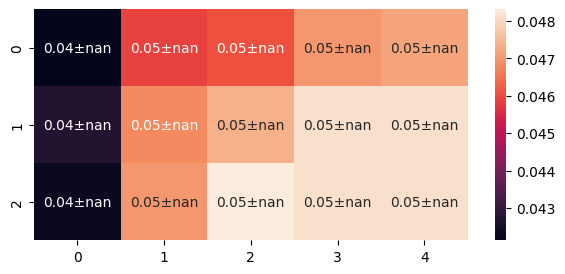

In [15]:
arr = []
std = []
for nImages in range(1,4):
  arr.append([np.max(df.query(f"nImages=={nImages} & beam=={beam}")["topn_mean"]).item() for beam in range(1,6)])
  std.append([np.max(df.query(f"nImages=={nImages} & beam=={beam}")["topn_std"]).item() for beam in range(1,6)])

import seaborn as sns
import pylab
pylab.subplots(figsize=(7,3))
arr = np.array(arr)
std = np.array(std)
annot = [[f"{round(arr[i,j]/20, 2)}±{round(1.96*std[i,j]/np.sqrt(20)/20, 2)}" for j in range(5)] for i in range(3)]
sns.heatmap(arr/20, annot=annot, fmt="")

AttributeError: module 'pylab' has no attribute 'label'

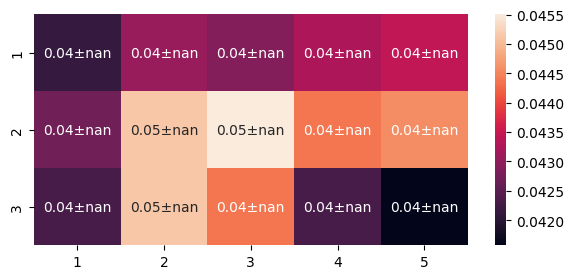

In [ ]:
arr = []
std = []
for nImages in range(1,4):
  arr.append([np.max(df.query(f"nImages=={nImages} & beam=={beam}")["top1_mean"]).item() for beam in range(1,6)])
  std.append([np.max(df.query(f"nImages=={nImages} & beam=={beam}")["top1_std"]).item() for beam in range(1,6)])

import seaborn as sns
import pylab
pylab.subplots(figsize=(7,3))
arr = np.array(arr)
std = np.array(std)
annot = [[f"{round(arr[i,j]/20, 2)}±{round(1.96*std[i,j]/np.sqrt(20)/20, 2)}" for j in range(5)] for i in range(3)]
sns.heatmap(arr/20, annot=annot, fmt="")
pylab.xticks(np.arange(5)+0.5,labels=[str(i) for i in range(1,6)])
pylab.yticks(np.arange(3)+0.5,labels=[str(i) for i in range(1,4)])
pylab.label